# Data Source

https://www.kaggle.com/datasets/simhyunsu/imdbextensivedataset?select=IMDb+movies.csv

# Import Packages / Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read in Data

In [2]:
# Read in datasets
df1 = pd.read_csv("Data/IMDb movies.csv")
df2 = pd.read_csv("Data/IMDb ratings.csv")

<ipython-input-2-7da2008d8fd4>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Data/IMDb movies.csv")


# Data Merge

In [3]:
# Manually select which columns we will use
df1 = df1[['imdb_title_id', 'title', 'year', 'genre', 'duration', 'country', 'actors', 'description', 'avg_vote', 'votes',  
           'reviews_from_users', 'reviews_from_critics']]

In [4]:
# Manually select which columns we will use
df2 = df2[['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote', 'males_allages_avg_vote',
     'males_allages_votes', 'females_allages_avg_vote', 'females_allages_votes', 'us_voters_rating', 'us_voters_votes',
    'non_us_voters_rating', 'non_us_voters_votes']]

In [5]:
# Merging two datasets on imdb_title_id
df = pd.merge(df1, df2, on='imdb_title_id')

# Data Cleaning

In [6]:
# Selecting only single genres
df = df[(df['genre'] == 'Drama') | (df['genre'] == 'Comedy') | (df['genre'] == 'Romance') | (df['genre'] == 'Horror') | 
  (df['genre'] == 'Crime') | (df['genre'] == 'Thriller') | (df['genre'] == 'Action') | (df['genre'] == 'Mystery') | 
  (df['genre'] == 'Adventure') | (df['genre'] == 'Western') | (df['genre'] == 'Film-Noir') | (df['genre'] == 'Sci-Fi') | 
  (df['genre'] == 'Family') | (df['genre'] == 'Documentary') | (df['genre'] == 'Musical') | (df['genre'] == 'History') | 
  (df['genre'] == 'Biography')]

In [7]:
# Removal of na values
df.dropna(inplace=True)

### Vader Sentiment Analysis

In [8]:
# Load the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on each description in the dataset
df['description_sentiment_score'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments based on the sentiment score
df['description_sentiment'] = df['description_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [9]:
# Extract everything before the comma or the entire content of the column
df['country'] = df['country'].apply(lambda x: x.split(',')[0] if ',' in x else x)

In [10]:
# Reorganizing the dataset
df = df[['title', 'year', 'genre', 'duration', 'country', 'description', 'description_sentiment_score',
         'description_sentiment', 'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics', 
         'weighted_average_vote', 'mean_vote', 'median_vote', 'total_votes', 'males_allages_avg_vote', 
         'males_allages_votes', 'females_allages_avg_vote', 'females_allages_votes', 'us_voters_rating',
         'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes']]

In [11]:
# Removal of any movie with a duration over 300
df = df[df['duration'] < 300]

In [12]:
# Removing any genre that does not have more than 100 instances to ensure each genre has adequate weight
genre_counts = df['genre'].value_counts()
single_movie_genres = genre_counts[genre_counts < 100].index

df = df[~df['genre'].isin(single_movie_genres)]

In [13]:
# Removing any country that does not have more than 10 instances to ensure each country has adequate weight
genre_counts = df['country'].value_counts()
single_movie_genres = genre_counts[genre_counts < 10].index

df = df[~df['country'].isin(single_movie_genres)]

In [14]:
# Removal of where year = TV Movie 2019
df = df[df['year'] != 'TV Movie 2019']

In [15]:
# Setting the year column as an integer
df['year'] = df['year'].astype(int)

# Sorting the dataframe by year
df = df.sort_values('year', ascending = False)

# Visuals

### Genres with Most Reviews

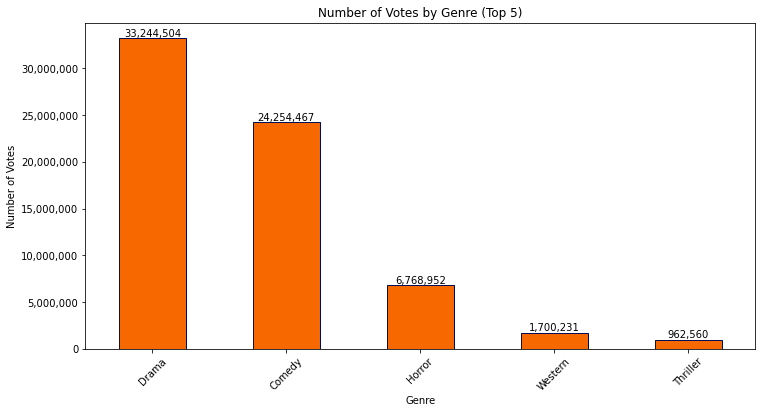

In [16]:
# Group the data by genre and calculate the sum of votes
genre_vote_counts = df.groupby('genre')['votes'].sum()

# Sort the genres by the sum of votes in descending order and select the top 5
top_5_genres = genre_vote_counts.sort_values(ascending=False).head(5)

# Plot the bar chart for the number of votes by genre (top 5)
plt.figure(figsize=(12, 6))

# Making the bars orange with blue outline for syracuse colors
ax = top_5_genres.plot(kind='bar', color='#F76900', edgecolor='#000E54')

# Setting the visual labels
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Genre (Top 5)')
plt.xticks(rotation=45)

# Format y-axis tick labels to disable scientific notation and add commas
# https://matplotlib.org/stable/api/ticker_api.html
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Add data labels to the bars with commas
for i, v in enumerate(top_5_genres):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# Display our visual
plt.show()

In [17]:
df[df['genre'] == 'Drama'].head(2)

,title,year,genre,duration,country,description,description_sentiment_score,description_sentiment,avg_vote,votes,...,median_vote,total_votes,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
55024,Shivaji Surathkal,2020,Drama,124,India,Detective Shivaji Surathkal is entrusted with ...,-0.7506,Negative,7.6,369,...,9.0,369,7.3,156.0,8.5,8.0,7.0,16.0,7.1,78.0
53016,Été 85,2020,Drama,100,France,What do you dream of when you're 16 years old ...,0.9146,Positive,7.0,519,...,7.0,519,6.9,297.0,6.9,51.0,5.1,14.0,7.0,272.0


### Top 5 Genres by Average Vote

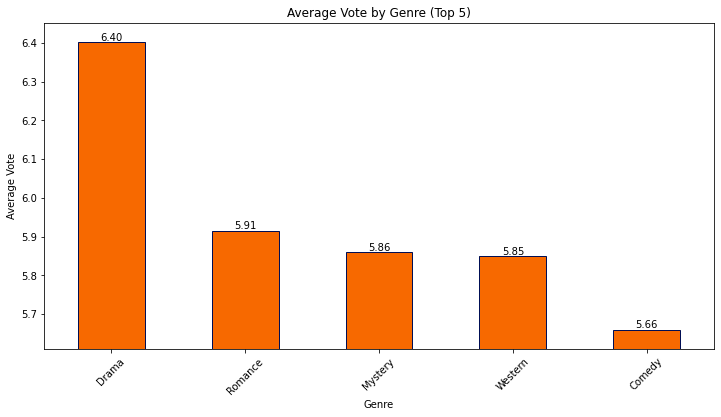

In [18]:
# Group the data by genre and calculate the average vote
genre_avg_vote = df.groupby('genre')['avg_vote'].mean()

# Sort the genres by the average vote in descending order and select the top 5
top_5_genres = genre_avg_vote.sort_values(ascending=False).head(5)

# Plot the bar chart for the average vote by genre (top 5)
plt.figure(figsize=(12, 6))

# Making the bars orange with blue outline for syracuse colors
ax = top_5_genres.plot(kind='bar', color='#F76900', edgecolor='#000E54')

# Creating data labels
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.title('Average Vote by Genre (Top 5)')
plt.xticks(rotation=45)

# Add data labels to the bars
# https://matplotlib.org/stable/api/ticker_api.html
for i, v in enumerate(top_5_genres):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
# Readjusting the y axis so we could better show differences in genre average votes
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
plt.ylim(top_5_genres.min() - 0.05, top_5_genres.max() + 0.05)    

# Display the visual
plt.show()

### Bottom 5 Genres by Average Vote

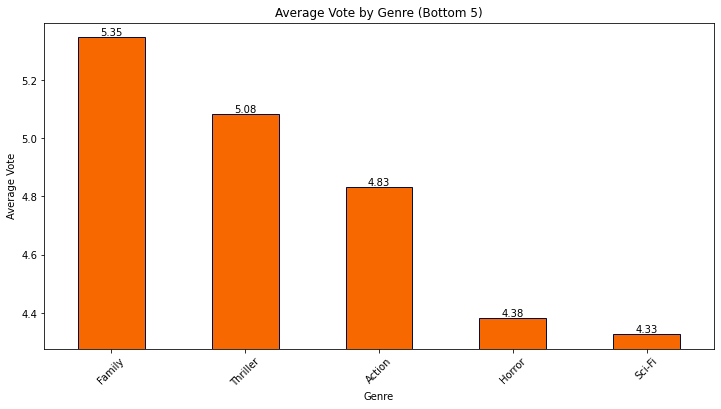

In [19]:
# Group the data by genre and calculate the average vote
bottom_5_genres = genre_avg_vote.sort_values(ascending=True).head(5)

# Reverse the order of genres and average vote values
bottom_5_genres = bottom_5_genres[::-1]

# Plot the bar chart for the average vote by genre (bottom 5) in descending order
plt.figure(figsize=(12, 6))

# Customizing the bar plot wit syracuse colors
ax = bottom_5_genres.plot(kind='bar', color='#F76900', edgecolor='#000E54')

# Creating data labels
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.title('Average Vote by Genre (Bottom 5)')
plt.xticks(rotation=45)

# Add data labels to the bars
# https://matplotlib.org/stable/api/ticker_api.html
for i, v in enumerate(bottom_5_genres):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
plt.ylim(bottom_5_genres.min() - 0.05, bottom_5_genres.max() + 0.05)   

# Display the visual
plt.show()


In [20]:
df[df['genre'] == 'Sci-Fi'].head(2)

,title,year,genre,duration,country,description,description_sentiment_score,description_sentiment,avg_vote,votes,...,median_vote,total_votes,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
55523,Trigger Points,2020,Sci-Fi,95,UK,The world had changed. Streets day by day were...,-0.9393,Negative,3.7,175,...,9.0,175,2.1,54.0,2.2,6.0,2.8,17.0,1.8,33.0
54992,Collision Earth,2020,Sci-Fi,84,USA,A large meteor shower unexpectedly bombards pl...,0.6705,Positive,2.2,288,...,2.0,288,2.1,181.0,2.4,31.0,2.4,49.0,2.1,126.0


### Genre Ratings by Gender
##### Women tend to vote higher.

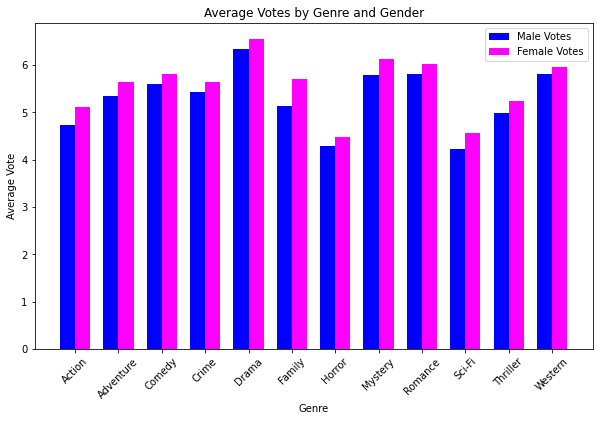

In [21]:
# Group the data by genre and calculate the average votes for males and females
genre_gender_votes = df.groupby(['genre']).agg({'males_allages_avg_vote': 'mean', 'females_allages_avg_vote': 'mean'})

# Get the genre labels and the average votes for males and females
genres = genre_gender_votes.index
male_votes = genre_gender_votes['males_allages_avg_vote']
female_votes = genre_gender_votes['females_allages_avg_vote']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
r1 = np.arange(len(genres))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

# Customizing male votes to blue
plt.bar(r1, male_votes, color='blue', width=bar_width, label='Male Votes')
# Customizing female votes to magenta
plt.bar(r2, female_votes, color='magenta', width=bar_width, label='Female Votes')

# Add labels, title, and legend
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.title('Average Votes by Genre and Gender')

# Setting x axis ticks
plt.xticks([r + bar_width/2 for r in range(len(genres))], genres, rotation=45)

# Display a legend for increase readability
plt.legend()

# Show the chart
plt.show()


### Men vs Women Average Vote ***

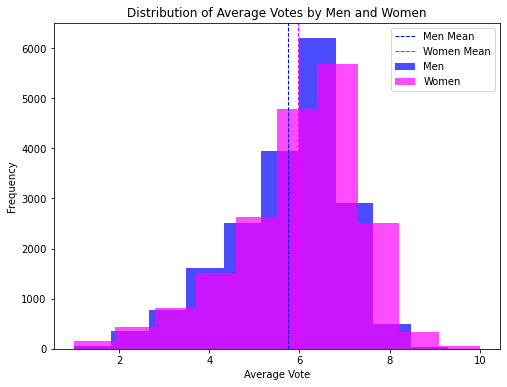

In [22]:
# Calculate the mean of average votes by men and women
mean_avg_votes_men = np.mean(df['males_allages_avg_vote'])
mean_avg_votes_women = np.mean(df['females_allages_avg_vote'])

# Plot the histograms of average votes by men and women
plt.figure(figsize=(8, 6))

# Creating histogram bins, blue for male, magenta for women
plt.hist(df['males_allages_avg_vote'], bins=10, color='blue', alpha=0.7, label='Men')
plt.hist(df['females_allages_avg_vote'], bins=10, color='magenta', alpha=0.7, label='Women')

# Plotting the mean for men and women, blue for men, magenta for women
plt.axvline(mean_avg_votes_men, color='blue', linestyle='dashed', linewidth=1, label='Men Mean')
plt.axvline(mean_avg_votes_women, color='magenta', linestyle='dashed', linewidth=1, label='Women Mean')

# Creating axis labels
plt.xlabel('Average Vote')
plt.ylabel('Frequency')

# Creating the title
plt.title('Distribution of Average Votes by Men and Women')

# To create our color coded guide/visual
plt.legend()

# Display the visual
plt.show()

### Movie Rating by Duration (Runtime)

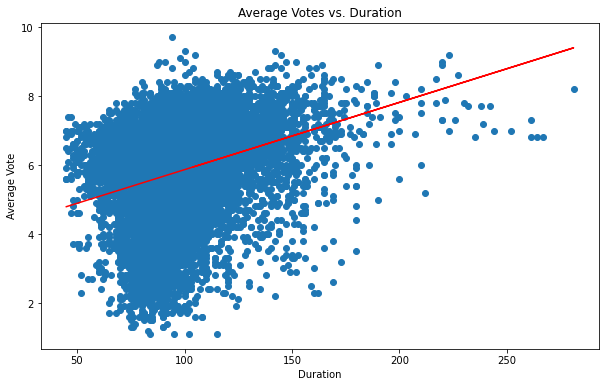

In [23]:
# Extracting relevant columns for plotting
duration = df['duration'].to_numpy()
avg_vote = df['avg_vote'].to_numpy()

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(duration, avg_vote)

# Creating axis labels
plt.xlabel('Duration')
plt.ylabel('Average Vote')
plt.title('Average Votes vs. Duration')

# Calculating and plotting the trend line
# Calculate the slope and y-intercept
m, b = np.polyfit(duration, avg_vote, 1)

# Plot the trend line
plt.plot(duration, m*duration + b, color='red')

plt.show()


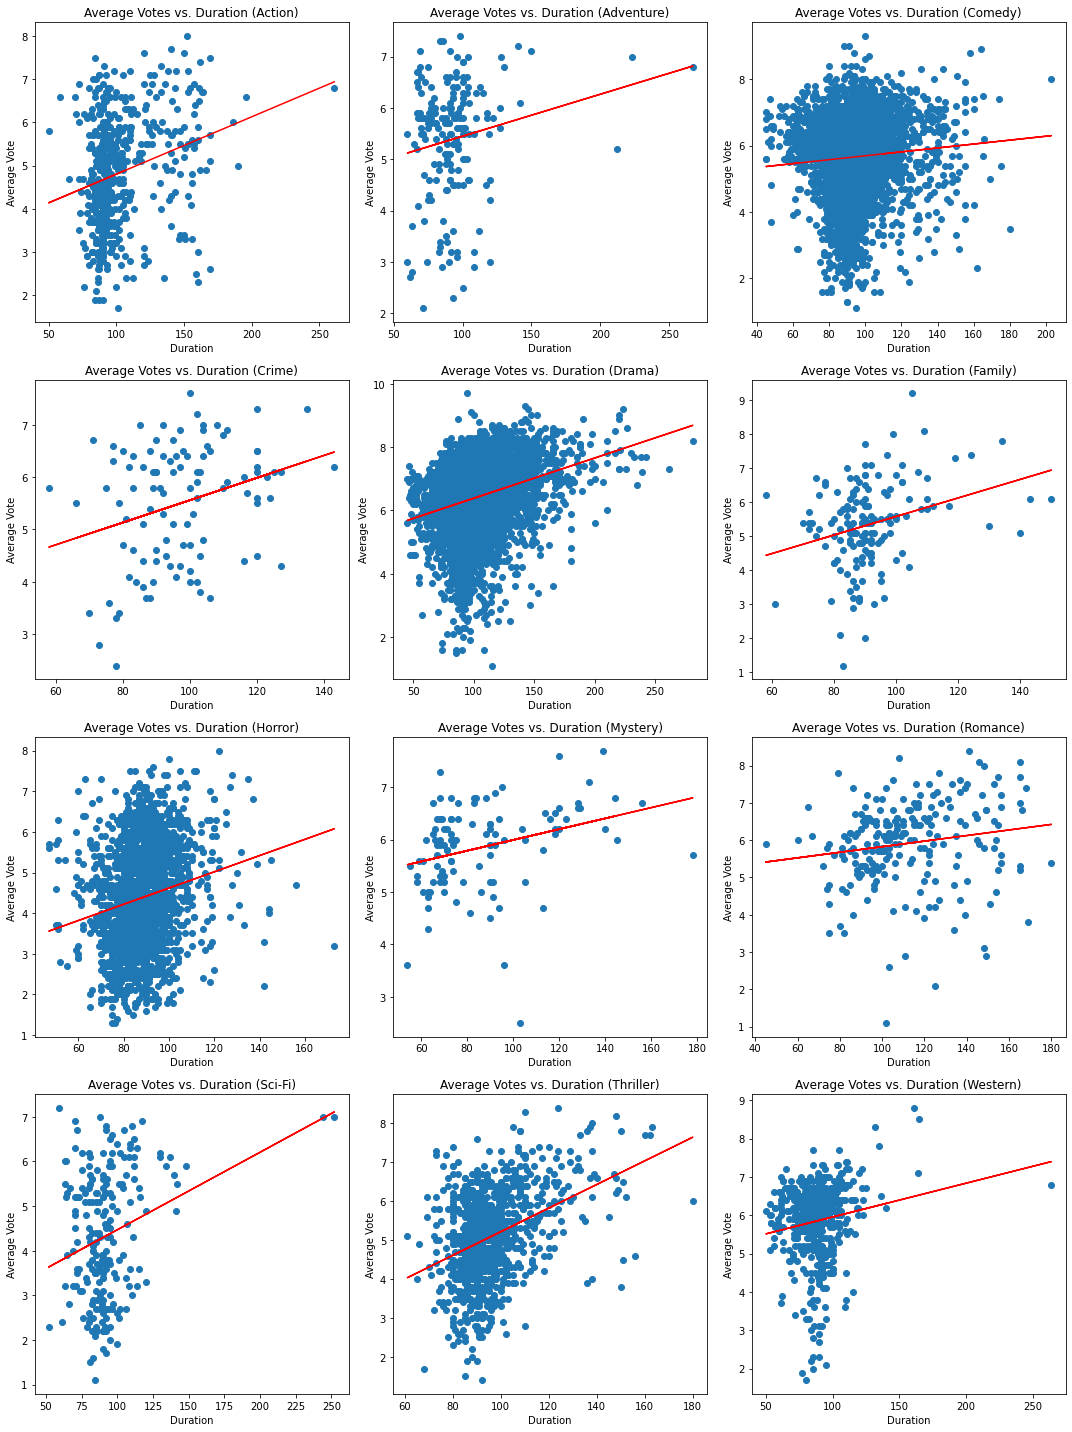

In [24]:
# List of genres
genres = ['Drama', 'Comedy', 'Horror', 'Thriller', 'Action', 'Western', 'Romance', 
          'Sci-Fi', 'Adventure', 'Family', 'Mystery', 'Crime']

# To ensure scatter plots get plotted in order
genres = sorted(genres)

# Create subplots for each genre
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

# Iterate through each genre and create scatter plot with trend line
for i, genre in enumerate(genres):
    genre_data = df[df['genre'] == genre]
    
    ax = axes[i]
    # Creating the scatter plot
    ax.scatter(genre_data['duration'].to_numpy(), genre_data['avg_vote'].to_numpy())
    # Creating axis labels
    ax.set_xlabel('Duration')
    ax.set_ylabel('Average Vote')
    ax.set_title(f'Average Votes vs. Duration ({genre})')
    
    # Calculate and plot trend line for each genre that will be plotted
    # Calculate the slope and y-intercept
    m, b = np.polyfit(genre_data['duration'].to_numpy(), genre_data['avg_vote'].to_numpy(), 1)
    
    # Plot the trend line
    ax.plot(genre_data['duration'].to_numpy(), m * genre_data['duration'].to_numpy() + b, color='red')
    
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

# Display the visual
plt.show()

### Countries with the Highest Average Review

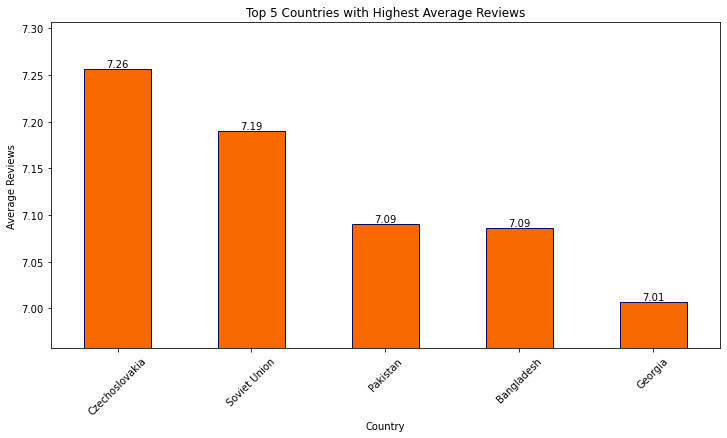

In [25]:
# Group the data by country and calculate the average reviews
country_avg_reviews = df.groupby('country')['avg_vote'].mean()

# Sort the countries by average reviews in descending order and select the top 5
top_5_countries = country_avg_reviews.sort_values(ascending=False).head(5)

# Plot the bar chart for the top 5 countries
plt.figure(figsize=(12, 6))
ax = top_5_countries.plot(kind='bar', color='#F76900', edgecolor='#000E54')

# Add data labels to the bars
for i, v in enumerate(top_5_countries):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Creating axis labels
plt.xlabel('Country')
plt.ylabel('Average Reviews')
plt.title('Top 5 Countries with Highest Average Reviews')
plt.xticks(rotation=45)

# Adjusting y axis to better display the differences in country and average_vote
plt.ylim(top_5_countries.min() - 0.05, top_5_countries.max() + 0.05)

# Display the visual
plt.show()

In [26]:
top_5_countries

country
Czechoslovakia    7.256667
Soviet Union      7.189899
Pakistan          7.090909
Bangladesh        7.086364
Georgia           7.007143
Name: avg_vote, dtype: float64

### Countries with the Lowest Average Review

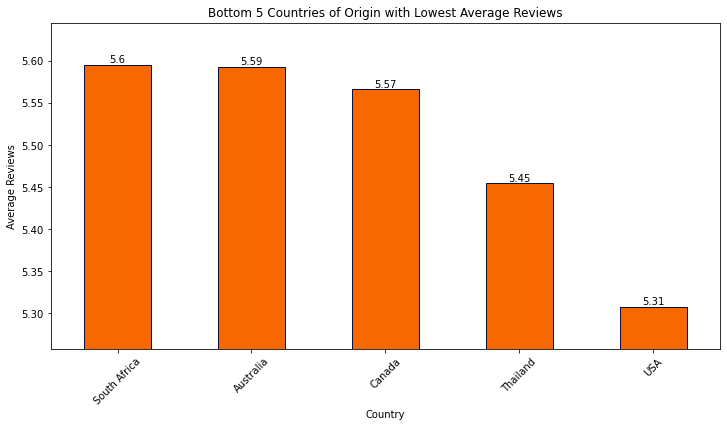

In [27]:
# Group the data by country and calculate the average reviews
country_avg_reviews = df.groupby('country')['avg_vote'].mean()

# Sort the countries by average reviews in ascending order and select the bottom 10
bottom_5_countries = country_avg_reviews.sort_values(ascending=True).head(5)

# Reversing the order
bottom_5_countries = bottom_5_countries[::-1]

# Plot the bar chart for the bottom 10 countries
plt.figure(figsize=(12, 6))
ax = bottom_5_countries.plot(kind='bar', color='#F76900', edgecolor='#000E54')

# Add data labels to the bars
for i, v in enumerate(bottom_5_countries):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Creating axis labels    
plt.xlabel('Country')
plt.ylabel('Average Reviews')
plt.title('Bottom 5 Countries of Origin with Lowest Average Reviews')
plt.xticks(rotation=45)

# Adjusting y axis to better display differences between countries average vote
plt.ylim(bottom_5_countries.min() - 0.05, bottom_5_countries.max() + 0.05)

# Display the visual
plt.show()

In [28]:
bottom_5_countries

country
South Africa    5.595313
Australia       5.592857
Canada          5.566124
Thailand        5.454688
USA             5.307983
Name: avg_vote, dtype: float64

### Plot Sentiment by Genre ****

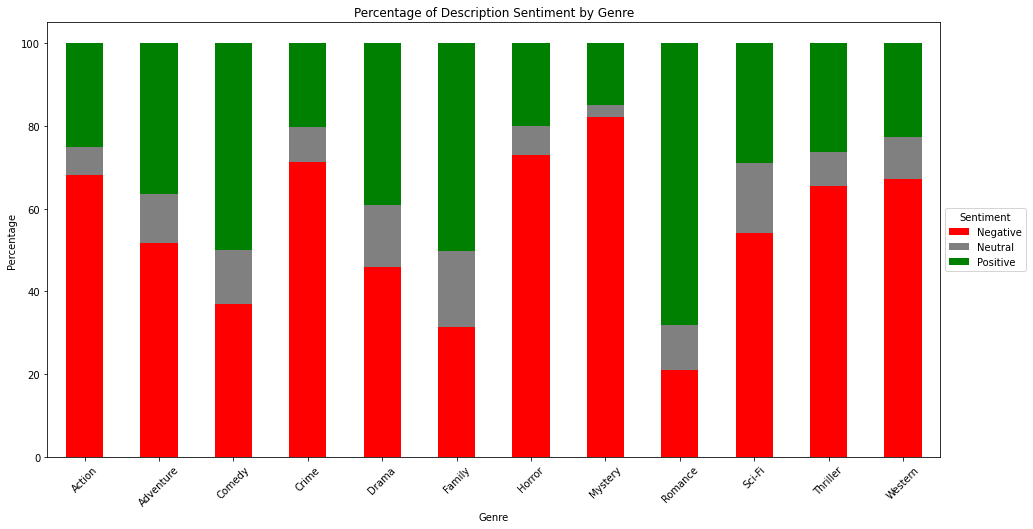

In [29]:
# Group the data by genre and description sentiment and calculate value counts
genre_sentiment_counts = df.groupby(['genre', 'description_sentiment']).size().unstack()

# Calculate the percentage for each sentiment within each genre
# Getting % of each genre
genre_sentiment_percentages = genre_sentiment_counts.div(genre_sentiment_counts.sum(axis=1), axis=0) * 100

# Define colors for the sentiment categories
colors = ['red', 'gray', 'green']

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the stacked bar chart of percentages with custom colors
genre_sentiment_percentages.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.title('Percentage of Description Sentiment by Genre')
plt.xticks(rotation=45)

# Move the legend to the right outside the visual
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the visual
plt.show()


In [30]:
genre_sentiment_percentages

description_sentiment,Negative,Neutral,Positive
genre,,,
Action,68.239564,6.715064,25.045372
Adventure,51.612903,11.827957,36.559140
Comedy,36.903477,13.150507,49.946016
Crime,71.153846,8.653846,20.192308
Drama,45.995172,14.790432,39.214395
Family,31.372549,18.300654,50.326797
Horror,73.047252,6.943105,20.009643
Mystery,82.075472,2.830189,15.094340
Romance,20.960699,10.917031,68.122271


### Plot Sentiment by Genre ****

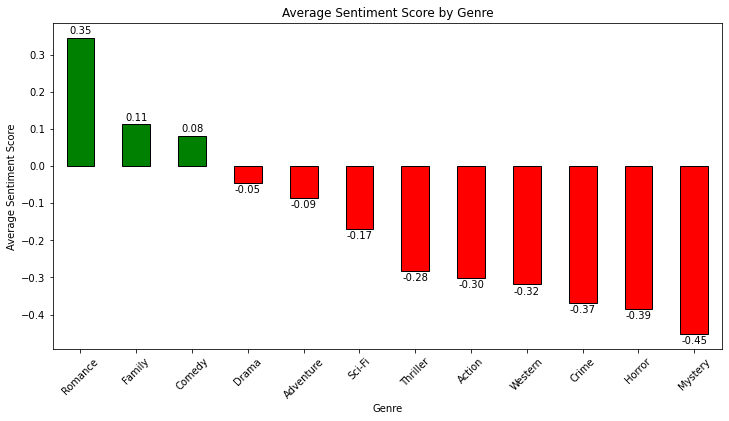

In [31]:
# Group the data by genre and calculate the average sentiment score
genre_avg_sentiment = df.groupby('genre')['description_sentiment_score'].mean()

# Sort the genres by the average sentiment score in descending order
genre_avg_sentiment = genre_avg_sentiment.sort_values(ascending=False)

# Define the colors for positive and negative values
positive_color = 'green'
negative_color = 'red'

# Plot the bar chart for the average sentiment score by genre
plt.figure(figsize=(12, 6))
ax = genre_avg_sentiment.plot(kind='bar', color=[positive_color if v >= 0 else negative_color for v in genre_avg_sentiment], edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Genre')
plt.xticks(rotation=45)

# Add data labels to the bars outside the bars, with padding
label_padding = 0.005

# Adding avg_sentiment as data labels by the actual value
for i, v in enumerate(genre_avg_sentiment):
    if v >= 0:
        ax.text(i, v + label_padding, f'{v:.2f}', ha='center', va='bottom')
    else:
        ax.text(i, v - label_padding, f'{v:.2f}', ha='center', va='top')

# Display the visual
plt.show()


### Male and Female Average Vote Over Time

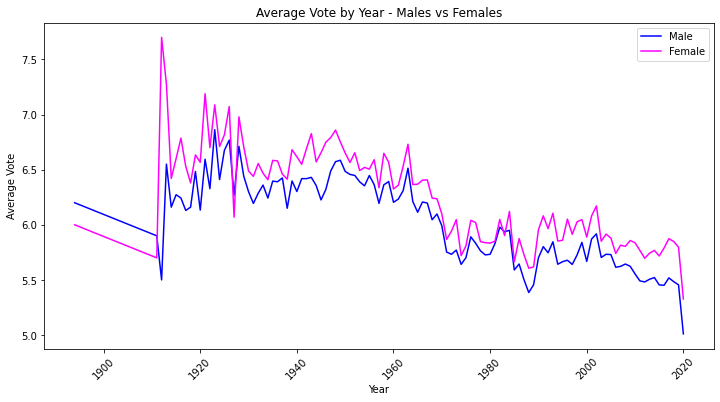

In [32]:
# Group the data by year and calculate the average vote for males and females
males_avg_vote = df.groupby('year')['males_allages_avg_vote'].mean()
females_avg_vote = df.groupby('year')['females_allages_avg_vote'].mean()

# Plot the line charts for the average vote by year for males and females
plt.figure(figsize=(12, 6))

# Plotting both men and women average_vote by year
males_avg_vote.plot(kind='line', color='blue', label='Male')
females_avg_vote.plot(kind='line', color='magenta', label='Female')

# Creating axis labels
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.title('Average Vote by Year - Males vs Females')
plt.legend()
plt.xticks(rotation=45)

# Display the visual
plt.show()

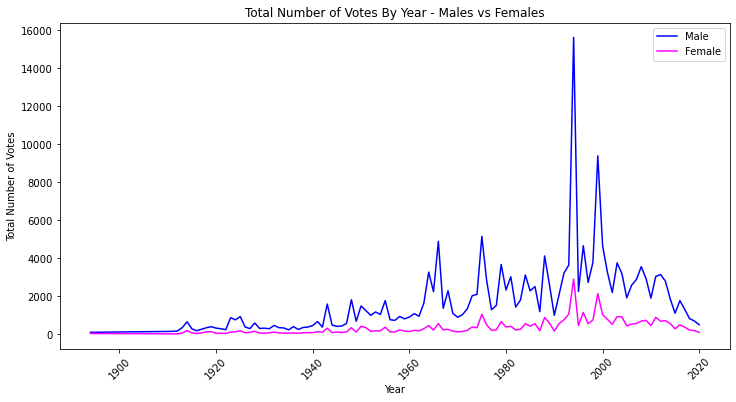

In [33]:
# Group the data by year and calculate the average vote for males and females
males_avg_vote = df.groupby('year')['males_allages_votes'].mean()
females_avg_vote = df.groupby('year')['females_allages_votes'].mean()

# Plot the line charts for the average vote by year for males and females
plt.figure(figsize=(12, 6))

# Creating the plot lines for both men and womens average_vote over time
males_avg_vote.plot(kind='line', color='blue', label='Male')
females_avg_vote.plot(kind='line', color='magenta', label='Female')

# Creating axis labels
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.title('Total Number of Votes By Year - Males vs Females')
plt.legend()
plt.xticks(rotation=45)

# Display the visuals
plt.show()

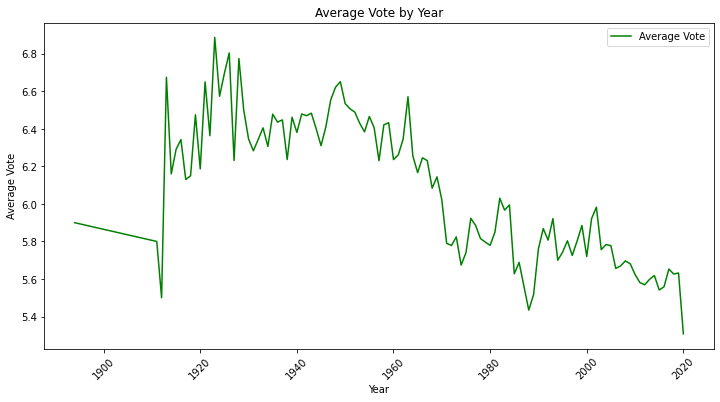

In [34]:
# Group the data by year and calculate the average vote for males and females
avg_voting = df.groupby('year')['avg_vote'].mean()

# Plot the line charts for the average vote by year for males and females
plt.figure(figsize=(12, 6))

# Ploting average_vote over time
avg_voting.plot(kind='line', color='green', label='Average Vote')

# Creating axis labels
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.title('Average Vote by Year')
plt.legend()
plt.xticks(rotation=45)

# Display the visual
plt.show()


In [35]:
avg_voting

year
1894    5.900000
1911    5.800000
1912    5.500000
1913    6.675000
1914    6.160000
          ...   
2016    5.558398
2017    5.652956
2018    5.626551
2019    5.631936
2020    5.307538
Name: avg_vote, Length: 111, dtype: float64